# Import Libraries

In [1]:
import zipfile, os

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from keras.preprocessing import image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Extract File

In [4]:
os.mkdir('dataset')
dataset_dir = 'dataset'

In [5]:
target_file = 'dataset.zip'

extracting = zipfile.ZipFile(target_file, 'r')

extracting.extractall(dataset_dir)

extracting.close()

In [2]:
train_dir = 'dataset/Training'
val_dir = 'dataset/Testing'

# Load Data

In [3]:
glioma_dir = os.path.join('dataset/Training/glioma')
meningioma_dir = os.path.join('dataset/Training/meningioma')
notumor_dir = os.path.join('dataset/Training/notumor')
pituitary_dir = os.path.join('dataset/Training/pituitary')

In [4]:
glioma_files = os.listdir(glioma_dir)
meningloma_files = os.listdir(meningioma_dir)
notumor_files = os.listdir(notumor_dir)
pituitary_files = os.listdir(pituitary_dir)

In [5]:
print('Total glioma images :', len(glioma_files))
print('Total meningloma images :', len(meningloma_files))
print('Total notumor images :', len(notumor_files))
print('Total pituitary images :', len(pituitary_dir))

Total glioma images : 1321
Total meningloma images : 1339
Total notumor images : 1595
Total pituitary images : 26


In [6]:
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

In [22]:
# Set up matplotlib fig

pic_index += 5

next_glioma_pix = [os.path.join(glioma_dir, fname)
                for fname in glioma_files[pic_index-5:pic_index]]
next_meningloma_pix = [os.path.join(meningioma_dir, fname)
                for fname in meningloma_files[pic_index-5:pic_index]]
next_notumor_pix = [os.path.join(notumor_dir, fname)
                for fname in notumor_files[pic_index-5:pic_index]]
next_pituitary_pix = [os.path.join(pituitary_dir, fname)
                for fname in pituitary_files[pic_index-5:pic_index]]

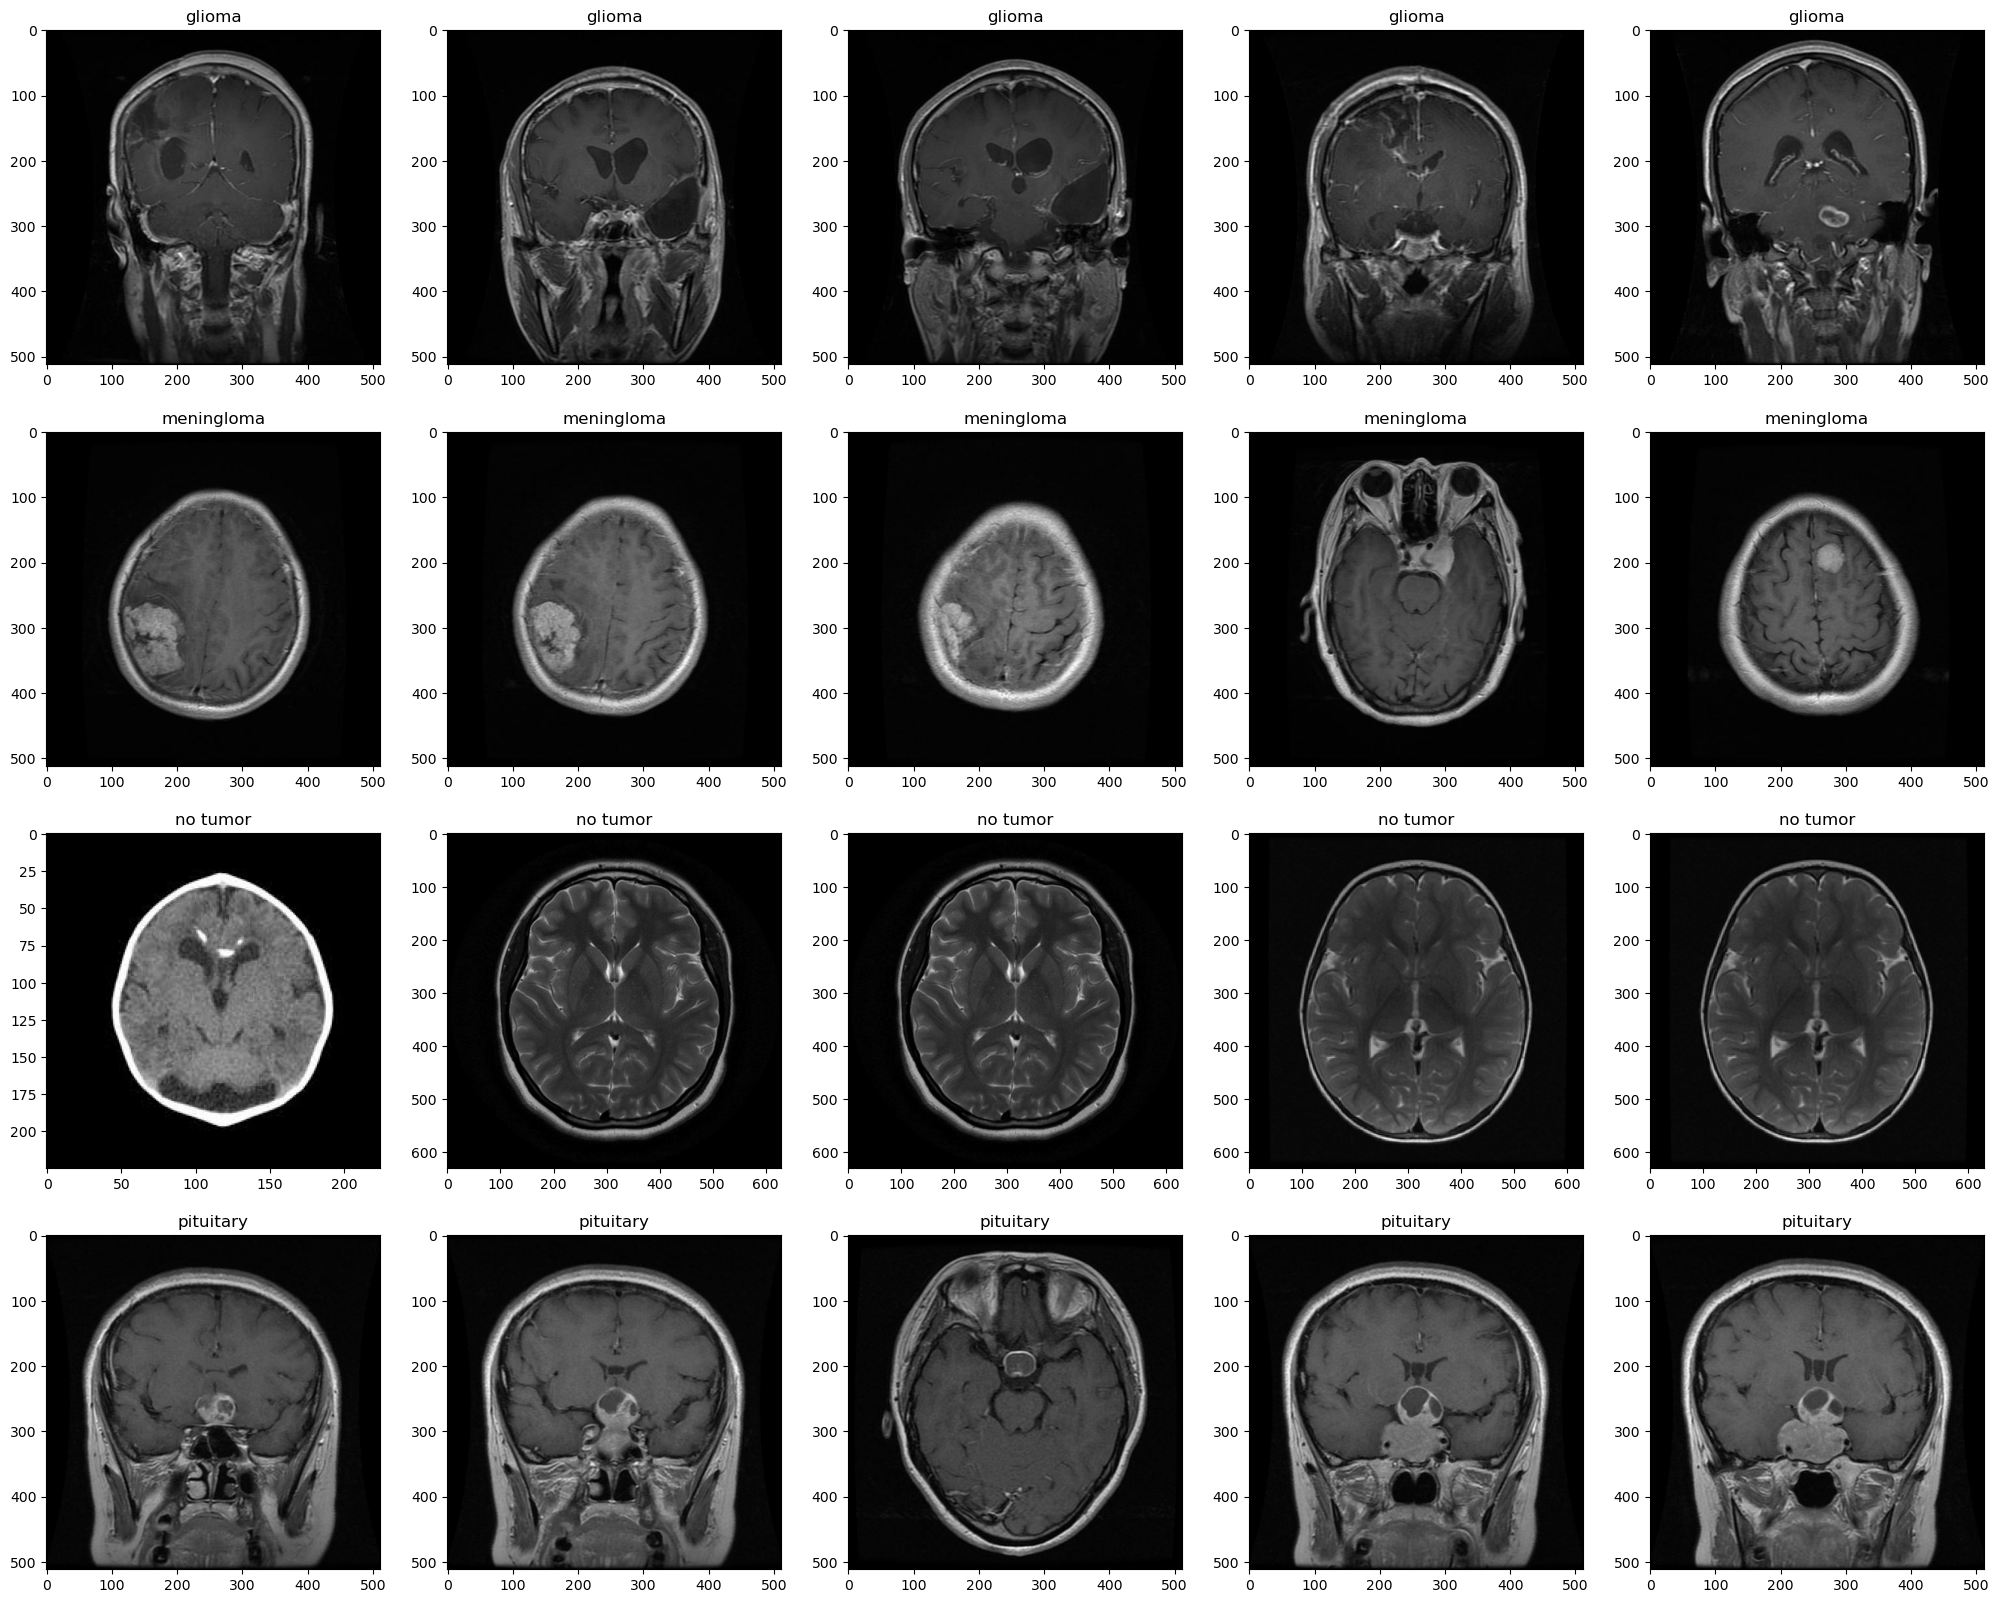

In [25]:
fig, axes = plt.subplots(4,5, figsize=(25,20))
row = 0
col1 = 0
col2 = 0
col3 = 0
col4 = 0
for i, img_path in enumerate(next_glioma_pix+next_meningloma_pix+next_notumor_pix+next_pituitary_pix):
    if i < 5:
        img = mpimg.imread(img_path)
        axes[row][col1].imshow(img)
        axes[row][col1].set_title('glioma')
        col1+=1
    elif i < 10 and i >= 5:
        row=1
        img = mpimg.imread(img_path)
        axes[row][col2].imshow(img)
        axes[row][col2].set_title('meningloma')
        col2+=1
    elif i < 15 and i >= 10:
        row=2
        img = mpimg.imread(img_path)
        axes[row][col3].imshow(img)
        axes[row][col3].set_title('no tumor')
        col3+=1
    elif i < 20 and i >= 15:
        row=3
        img = mpimg.imread(img_path)
        axes[row][col4].imshow(img)
        axes[row][col4].set_title('pituitary')
        col4+=1

# Data Augmentation

In [23]:
datagen = ImageDataGenerator(
    rescale=1./255
)

In [24]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# Modelling

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(150,150,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [ ]:
model.compile(metrics=['acc'], loss='categorical_crossentropy', optimizer='adam')

history= model.fit(train_generator, epochs=10, validation_data=val_generator, shuffle=True)

Epoch 1/10
179/179 [==============================] - 628s 4s/step - loss: 0.6399 - acc: 0.7540 - val_loss: 0.3779 - val_acc: 0.8474
Epoch 2/10
179/179 [==============================] - 620s 3s/step - loss: 0.2545 - acc: 0.9107 - val_loss: 0.2594 - val_acc: 0.8947
Epoch 3/10
179/179 [==============================] - 623s 3s/step - loss: 0.1472 - acc: 0.9466 - val_loss: 0.2308 - val_acc: 0.9176
Epoch 4/10
179/179 [==============================] - 620s 3s/step - loss: 0.1075 - acc: 0.9597 - val_loss: 0.1705 - val_acc: 0.9405
Epoch 5/10
179/179 [==============================] - 653s 4s/step - loss: 0.0672 - acc: 0.9764 - val_loss: 0.1748 - val_acc: 0.9458
Epoch 6/10
179/179 [==============================] - 631s 4s/step - loss: 0.0485 - acc: 0.9837 - val_loss: 0.2552 - val_acc: 0.9306
Epoch 7/10
179/179 [==============================] - 630s 4s/step - loss: 0.0413 - acc: 0.9874 - val_loss: 0.1544 - val_acc: 0.9603
Epoch 8/10
179/179 [==============================] - 628s 4s/step - 

# Evaluation

> Model isn't overfit or underfit

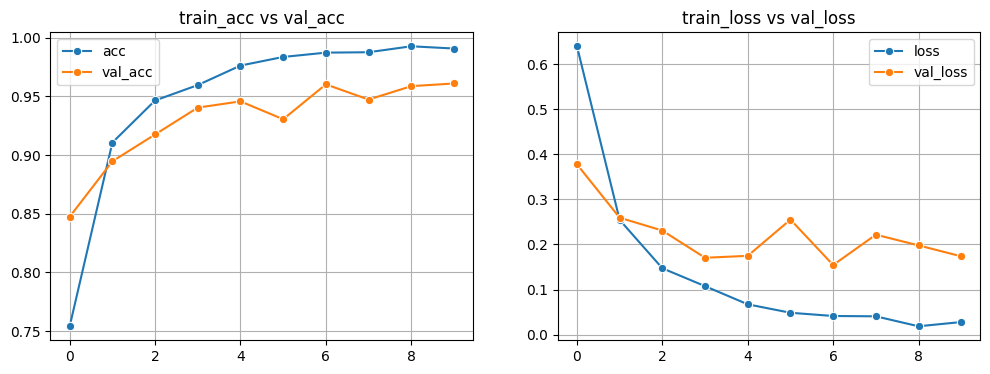

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(data=history.history['acc'], ax=axes[0], label='acc', marker='o')
sns.lineplot(data=history.history['val_acc'], ax=axes[0], label='val_acc', marker='o')

sns.lineplot(data=history.history['loss'], ax=axes[1], label='loss', marker='o')
sns.lineplot(data=history.history['val_loss'], ax=axes[1], label='val_loss', marker='o')

axes[0].set_title('train_acc vs val_acc')
axes[1].set_title('train_loss vs val_loss')

axes[0].grid(True)
axes[1].grid(True)

plt.legend()
plt.show()

# Save Model

In [27]:
import keras

In [ ]:
model.save('brain_tumor.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
model = keras.models.load_model('brain_tumor.h5')

C:\Users\brian\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Implementation

In [35]:
dict_class = val_generator.class_indices
print('Dictionary: {}'.format(dict_class))
class_names = list(dict_class.keys())  # storing class/breed names in a list
print('Class labels: {}'.format(class_names))

Dictionary: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Class labels: ['glioma', 'meningioma', 'notumor', 'pituitary']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


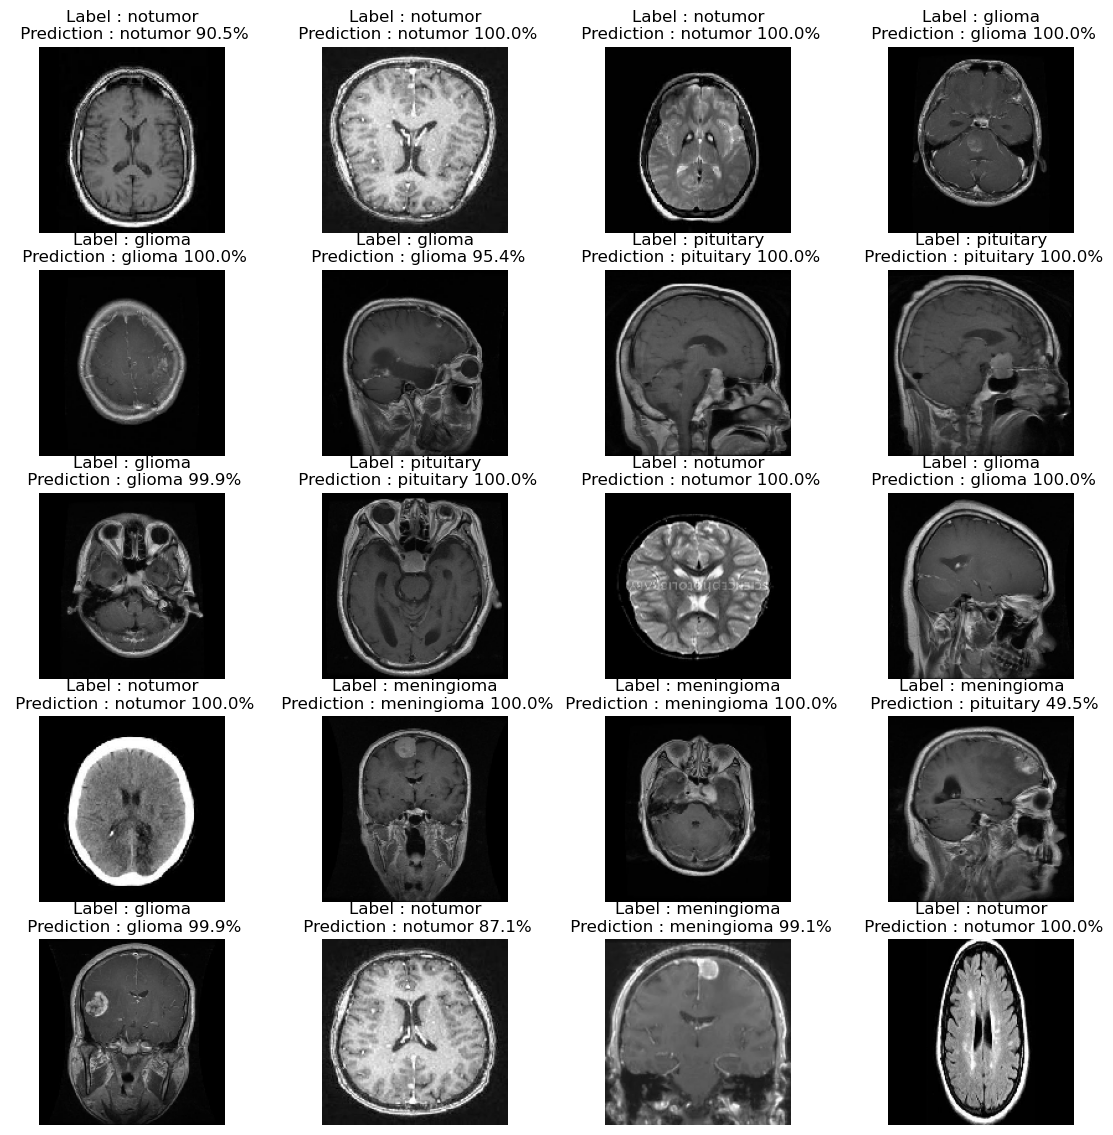

In [36]:
val_generator.reset()
img, label = next(val_generator)

prediction = model.predict(img)
test_pred_classes = np.argmax(prediction, axis=1)

plt.figure(figsize=(14,14))

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title("Label : {}\n Prediction : {} {:.1f}%".format(class_names[np.argmax(label[i])], class_names[test_pred_classes[i]], 100 * np.max(prediction[i])))
plt.show()

In [ ]:
from google.colab import files

Saving image(2).jpg to image(2) (2).jpg
1/1 [==============================] - 0s 55ms/step
meningloma_tumor


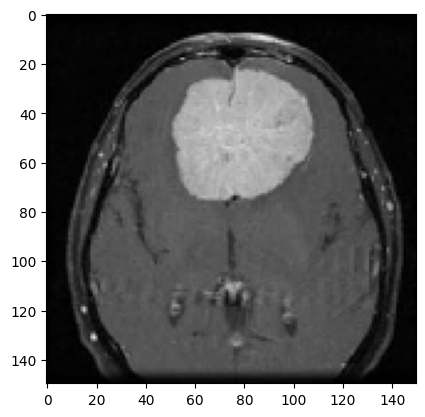

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  if classes[0][0] == 1:
    print('giloma tumor')
  elif classes[0][1] == 1:
    print('meningloma_tumor')
  elif classes[0][2] == 1:
    print('no tumor')
  elif classes[0][3] == 1:
    print('pituitary_umot')